In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('output_data/melted.csv', index_col=0)

In [3]:
df.pageviews = pd.to_numeric(df.pageviews)

# EDA

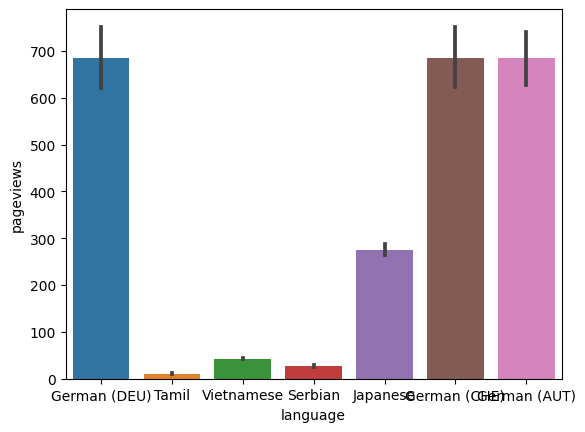

In [4]:
sns.barplot(x="language", y="pageviews", data=df)
plt.show()

# Stay Home Requirements

Only look at the stay_home_requirements and after_lockdown_start for now.

In [5]:
df_stay_home = pd.read_csv('output_data/cleaned.csv')

In [6]:
df_stay_home = df_stay_home.dropna(axis=1)
df_stay_home = df_stay_home.set_index(df_stay_home.date).drop(columns="date")
df_stay_home.head()

,book,jogging,origami,yoga,bread,orchids,mindfulness,podcast,calligraphy,board games,language,stay_home_requirements,after_lockdown_start,stringency_index
date,,,,,,,,,,,,,,
2020-01-01,159,69,135,718,191,282,0,1943,133,1667,German (DEU),0,0,0.0
2020-01-01,11,0,6,80,1,3,1,2,1,2,Tamil,0,0,0.0
2020-01-01,33,22,10,33,43,52,17,33,52,26,Vietnamese,0,0,0.0
2020-01-01,2,7,4,8,15,8,5,18,6,159,Serbian,0,0,0.0
2020-01-01,90,50,133,233,177,123,209,183,201,164,Japanese,0,0,0.0


Only select the rows where after the first lockdown the stay_home_requirements are not zero, as later values for this column could produce noise.

<AxesSubplot: >

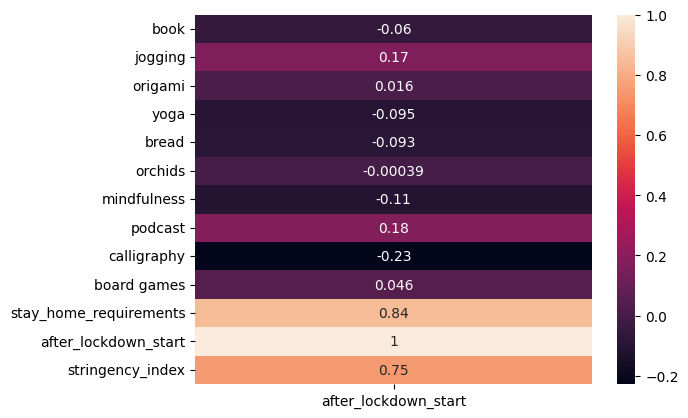

In [7]:
sns.heatmap(df_stay_home[(df_stay_home["after_lockdown_start"] == 0) | (df_stay_home["stay_home_requirements"] > 0)].corr()[['after_lockdown_start']], annot=True)

<AxesSubplot: >

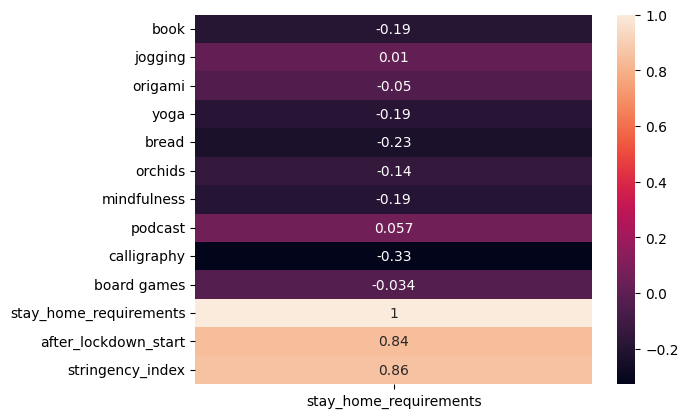

In [8]:
sns.heatmap(df_stay_home[(df_stay_home["after_lockdown_start"] == 0) | (df_stay_home["stay_home_requirements"] > 0)].corr()[['stay_home_requirements']], annot=True)

Correlation with stay_home_requirements.

<AxesSubplot: >

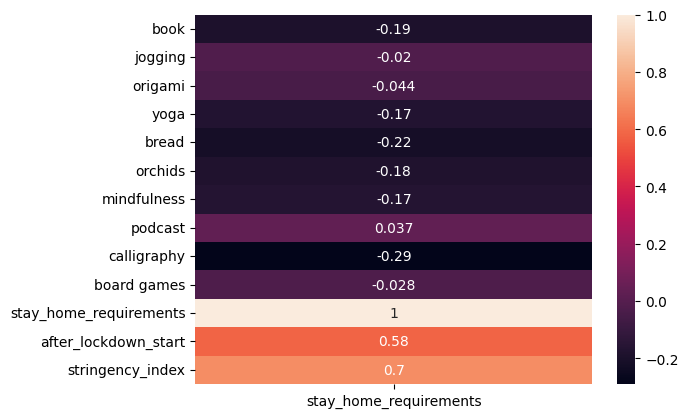

In [9]:
sns.heatmap(df_stay_home.corr()[['stay_home_requirements']], annot=True)

# Stringency Index

<AxesSubplot: >

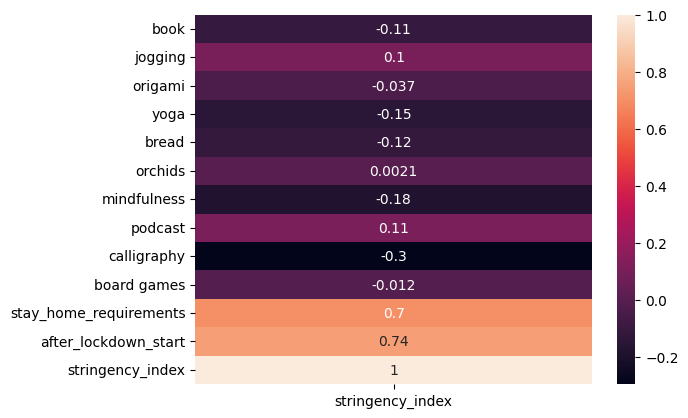

In [10]:
sns.heatmap(df_stay_home[(df_stay_home["after_lockdown_start"] == 0) | (df_stay_home["stringency_index"] > 0)].corr()[['stringency_index']], annot=True)

<AxesSubplot: >

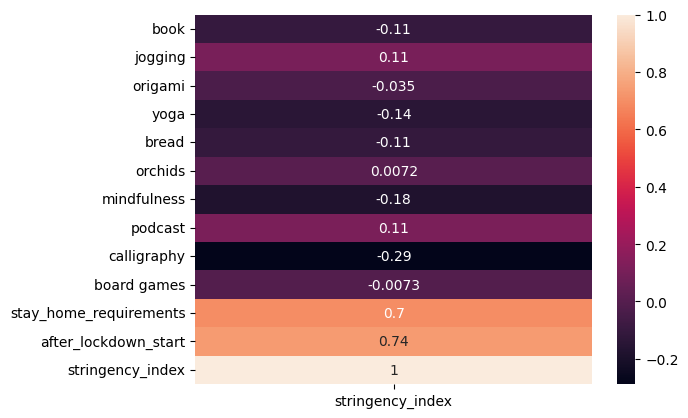

In [11]:
sns.heatmap(df_stay_home.corr()[['stringency_index']], annot=True)